In [1]:
import os
os.getcwd()

In [2]:
try:
    # --------Helper------------
    import preprocess as pp

    # --------General------------
    import cv2 as cv2
    import os
    import pickle
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import time as t

    # ----sklearn----------------
    from sklearn.utils import shuffle
    from sklearn.model_selection import train_test_split

    from keras.utils import np_utils
    # --------Tensorflow---------
    import tensorflow as tf


    # --------Keras--------------
    import keras
    from keras import backend as K
    # K.set_image_dim_ordering('th')
    from keras.callbacks import ModelCheckpoint, EarlyStopping
    from keras import layers, callbacks
    from keras.models import Model
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D,GlobalAveragePooling2D ,MaxPooling2D, BatchNormalization,LSTM
    from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
    print("-------------------Libraries Loaded Successfully!!!-------------------------------------------")
except:
    print("Library not Found ! ")


Libraries Loaded Successfully!!!
D:\Major\Models\lwdct


Using TensorFlow backend.


-------------------Libraries Loaded Successfully!!!-------------------------------------------


<b>----------------------------------Loading the train data----------------------------------------------------------------------<b>

In [3]:
#Informarion
PATH = "D:/Major/Models/lwdct/segmented_frameset_resized/train/"
IMAGE_SIZE = 64

# Loading the dataset
X_train,Y_train=pp.load_dataset(PATH , IMAGE_SIZE)

#Converting labels into one hot
labels_train=np.array(Y_train)
num_classes=6
Y_train = np_utils.to_categorical(labels_train, num_classes)#onehot class Labels

# Class Labels
cl=["HandShaking","Hugging","Kicking","Pointing","Punching","PUSHING"]



Reading Dataset from Pickle Object in  D:\Major\Models\lwdct


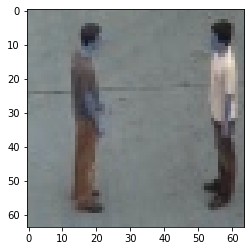

In [4]:
plt.imshow(X_train[5])

In [5]:
# Loading the dataset
#Informarion
PATHtest = "D:/Major/Models/lwdct/segmented_frameset_resized/validation/"

X_test,Y_test=pp.load_val(PATHtest , IMAGE_SIZE)

#Converting labels into one hot
labels_test=np.array(Y_test)
num_classes=6
Y_test = np_utils.to_categorical(labels_test, num_classes)#onehot class Labels


Reading Dataset from Pickle Object in  D:\Major\Models\lwdct


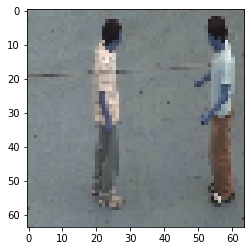

In [6]:
plt.imshow(X_test[5])

<b>---------------Split data into train test--------------------------------------------------------------
 <b>

In [7]:

epochs =  30
batch_size = int(.25 * 480)
if batch_size > 128:
    batch_size = 128 # batch size caps at 128

print("Shape of train set and labels:",X_train.shape,Y_train.shape)
print("Shape of test set and labels:",X_test.shape,Y_test.shape)



x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train /= 255
x_test /= 255

#input shape
input_shape=X_train[0].shape
print("Input Shape of Each Image:",input_shape)



Shape of train set and labels: (480, 64, 64, 3) (480, 6)
Shape of test set and labels: (120, 64, 64, 3) (120, 6)
Input Shape of Each Image: (64, 64, 3)


<b>AlexNet Model<b>

In [8]:

model = Sequential()

model.add(Conv2D(32, (5,5),strides=(1,1),padding='same', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (5,5),strides=(1,1),padding='same', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))


model.add(Conv2D(64, (3,3),strides=(1,1),padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3,3),strides=(1,1),padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))


model.add(Conv2D(96, (3,3),strides=(1,1),padding='same', input_shape=(16,16,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(96, (3,3),strides=(1,1),padding='same', input_shape=(16,16,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))


model.add(Conv2D(128, (3,3),strides=(1,1),padding='same', input_shape=(8,8,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3,3),strides=(1,1),padding='same', input_shape=(8,8,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Flatten())
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5,name='last_layer'))

model.add(Dense(6))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)       

<b>training the model to get estimate time<b>


In [9]:
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

s=t.time()
model.fit(x_train,Y_train,validation_data=[X_test,Y_test],batch_size=15,epochs=epochs)
e=t.time()
print("traintime-",((e-s)/60))

Train on 480 samples, validate on 120 samples
Epoch 1/30
480/480 [==============================] - 10s 20ms/step - loss: 1.6622 - accuracy: 0.3500 - val_loss: 163.5452 - val_accuracy: 0.1667
Epoch 2/30
480/480 [==============================] - 3s 7ms/step - loss: 1.1379 - accuracy: 0.6042 - val_loss: 109.5545 - val_accuracy: 0.1667
Epoch 3/30
480/480 [==============================] - 3s 6ms/step - loss: 0.8920 - accuracy: 0.7417 - val_loss: 60.7816 - val_accuracy: 0.1667
Epoch 4/30
480/480 [==============================] - 3s 6ms/step - loss: 0.7204 - accuracy: 0.8250 - val_loss: 37.2188 - val_accuracy: 0.1417
Epoch 5/30
480/480 [==============================] - 3s 6ms/step - loss: 0.6286 - accuracy: 0.8854 - val_loss: 70.6140 - val_accuracy: 0.1667
Epoch 6/30
480/480 [==============================] - 3s 6ms/step - loss: 0.5546 - accuracy: 0.9000 - val_loss: 115.9387 - val_accuracy: 0.1417
Epoch 7/30
480/480 [==============================] - 3s 6ms/step - loss: 0.4774 - accuracy

In [10]:

# define the layer for feature extraction
intermediate_layer = Model(inputs=model.input, outputs=model.get_layer('last_layer').output)

feature_engineered_train = intermediate_layer.predict(x_train)
feature_engineered_train = pd.DataFrame(feature_engineered_train)

feature_engineered_test = intermediate_layer.predict(x_test)
feature_engineered_test = pd.DataFrame(feature_engineered_test)


print(feature_engineered_train.shape)
print(feature_engineered_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(480, 512)
(120, 512)
(480, 6)
(120, 6)


In [11]:
#Recombine dataset
Features=feature_engineered_train.append(feature_engineered_test, ignore_index=True)
Features_labels=np.vstack((Y_train,Y_test))


In [12]:
#Convert Pandas dataframe to Numpy to work on them
X=Features.to_numpy()
type(X)

numpy.ndarray

In [13]:
# Creating blocks to feed it to the lstm layer

In [14]:
def data_blocks(n,x):
    blocks=int(len(x)/n)
    X_train=np.array(np.split(x,blocks))
    print(X_train.shape,type(X_train))
    return X_train

In [15]:
X=data_blocks(5,X)

(120, 5, 512) <class 'numpy.ndarray'>


In [16]:
def label_blocker(n,y):
    Y=[]
    for i in range(0,len(y),5):
        Y.append(y[i])
    return Y

In [17]:
y=label_blocker(5,Features_labels)
type(y)

list

In [18]:
Y=np.array(y)
Y.shape

(120, 6)

In [19]:
X.shape

(120, 5, 512)

## <b>LSTM Training

In [20]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

print("Shape of train set and labels:",X_train.shape,y_train.shape)
print("Shape of test set and labels:",X_test.shape,y_test.shape)


Shape of train set and labels: (96, 5, 512) (96, 6)
Shape of test set and labels: (24, 5, 512) (24, 6)


In [21]:
#np.save("./output/filename.npy")

Early stopping to reduce overfitting

In [22]:
c1=ModelCheckpoint("./output/lstm.hdf5",save_best_only=True)
c2=EarlyStopping(monitor='val_acc',patience=5,verbose=1)#verbose?
callbacks=[c2,c2]

<b> MOdel

In [23]:
model1=Sequential()
model1.add(LSTM(512,input_shape=(5,512),activation='sigmoid',return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(256,activation='sigmoid'))

model1.add(Dense(100,activation='sigmoid'))

model1.add(Dense(6,activation='softmax'))

In [24]:
# Training the Model

In [25]:
model1.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

s=t.time()
history=model1.fit(X_train,y_train,validation_data=[X_test,y_test],epochs=20)
e=t.time()
print("traintime-",((e-s)/60))

Train on 96 samples, validate on 24 samples
Epoch 1/20
96/96 [==============================] - 0s 5ms/step - loss: 1.8809 - accuracy: 0.2188 - val_loss: 1.7414 - val_accuracy: 0.1250
Epoch 2/20
96/96 [==============================] - 0s 509us/step - loss: 1.6748 - accuracy: 0.3542 - val_loss: 1.6503 - val_accuracy: 0.3333
Epoch 3/20
96/96 [==============================] - 0s 540us/step - loss: 1.5544 - accuracy: 0.5000 - val_loss: 1.4825 - val_accuracy: 0.8333
Epoch 4/20
96/96 [==============================] - 0s 514us/step - loss: 1.3900 - accuracy: 0.8542 - val_loss: 1.3087 - val_accuracy: 0.9167
Epoch 5/20
96/96 [==============================] - 0s 529us/step - loss: 1.2261 - accuracy: 0.8750 - val_loss: 1.1447 - val_accuracy: 0.9167
Epoch 6/20
96/96 [==============================] - 0s 491us/step - loss: 1.0693 - accuracy: 0.8750 - val_loss: 0.9589 - val_accuracy: 0.9167
Epoch 7/20
96/96 [==============================] - 0s 491us/step - loss: 0.9169 - accuracy: 0.8646 - val_

In [26]:
# Predictions

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


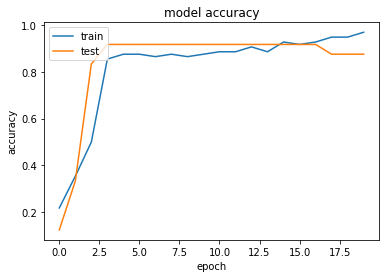

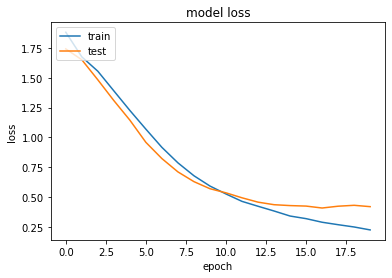

In [27]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()